<a href="https://colab.research.google.com/github/Heavymetal17/ML-uses-in-Finance/blob/main/Ml_credit_card_fraud_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
df = pd.read_csv("creditcard.csv")


In [ ]:
## link to data https://www.kaggle.com/mlg-ulb/creditcardfraud/download

In [ ]:
# Grab a peek at the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(df.shape)    #print shape of data
# data = data.sample(frac = 0.1, random_state = 48)
print(df.describe())


(23858, 31)
               Time            V1            V2            V3            V4  \
count  23858.000000  23858.000000  23858.000000  23858.000000  23858.000000   
mean   18213.370609     -0.239141      0.198892      0.727022      0.248619   
std    11377.032190      1.894219      1.533073      1.724887      1.440938   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     6624.750000     -0.959528     -0.376134      0.287941     -0.658457   
50%    20564.000000     -0.288644      0.192491      0.874426      0.216440   
75%    29010.250000      1.164867      0.843146      1.505467      1.122367   
max    32954.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  23858.000000  23858.000000  23858.000000  23858.000000  23858.000000   
mean      -0.188428      0.082789     -0.132080      0.022901      0.499391   
std        1.439894      1.328159      

In [ ]:
# determine the no. of frauds in dataset
frauds = df[(df['Class']==1)]
valids = df[(df['Class']==0)]
ratio=float(len(frauds))/float(len(valids))
print(ratio)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))



0.003702301316841264
Fraud Cases: 88
Valid Transactions: 23769


In [ ]:
#highly imbalanced data coz only 0.17 percent are frauds
#if model does'nt give good accuracy we would need to balance the data
#would be using undersampling (for valid transcations) or over sampling(for frauds ones)
# Undersampling refers to sampling from the majority class in order to keep only a part of these data points 
# It may be carried out using RandomUnderSampler class from imblearn library
#Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. 
#This might consist of either replicating or generating synthetic data for the minority class.
#It may be carried out using RandomOverSampler class from imblearn library.
#SMOTE synthetic minority oversampling technique also in imblearn 
# types of smote : boderline smote; boderline smote svm; adaptive synthetic sampling adasyn

In [ ]:
print('Details of the fraudulent transaction amount')
frauds.Amount.describe()


Details of the fraudulent transaction amount


count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
valids.Amount.describe()


details of valid transaction


count    23769.000000
mean        73.880199
std        212.541174
min          0.000000
25%          6.000000
50%         18.110000
75%         65.850000
max       7879.420000
Name: Amount, dtype: float64

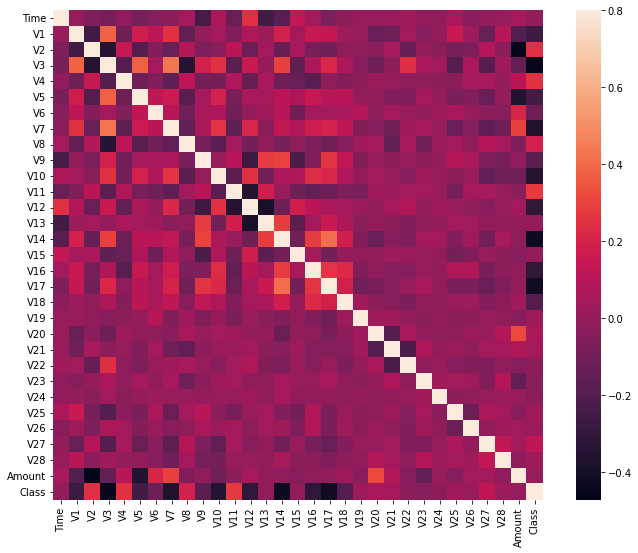

In [ ]:
# Correlation matrix
cormatrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormatrix, vmax = .8, square = True)
plt.show()


In [ ]:
df.isnull().sum().sum()
df1 = df[df.isnull().any(axis=1)]
#df = df.reset_index(drop=True)
df1

df = df.dropna()
df = df.reset_index(drop=True)
df2 = df[df.isnull().any(axis=1)]

In [ ]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)



(23857, 30)
(23857,)


In [ ]:
# Using Scikit-learn 
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.2, random_state = 42)


In [ ]:
Xtest.isnull().values.any()
#Xtest.isnull().sum()
Xtest.isnull().sum().sum()

0

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0=1, max_iter=10, shuffle=False, validation_fraction=0.2, penalty=None, alpha=0, fit_intercept=True, warm_start=False)
p.fit(Xtrain, Ytrain)

Perceptron(alpha=0, eta0=1, max_iter=10, shuffle=False, validation_fraction=0.2)

In [ ]:
p.coef_[0][1]

-5225.716241097167

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', alpha=0.001, learning_rate='constant', eta0=0.01, max_iter=10, random_state=32)
sgd.fit(Xtrain, Ytrain)
sgd.score(Xtest, Ytest)

0.9970662196144174

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

distributions = {'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}
lr = LogisticRegression(solver='saga', random_state=32, tol=0.01, max_iter=200)
rsc = RandomizedSearchCV(lr, param_distributions=distributions, random_state=32)
rsc.fit(Xtrain, Ytrain)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=32,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                                        'penalty': ['l1', 'l2']},
                   random_state=32)

In [ ]:
rsc.best_params_

{'penalty': 'l1', 'C': 0.5}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf'], 'C': [1,10]}
svc = SVC()
gsc = GridSearchCV(svc, param_grid=param_grid)
gsc.fit(Xtrain, Ytrain)
gsc.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
gsc.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
gsc.best_score_

0.9980089075189941

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=5, min_impurity_decrease=0.001, random_state=32)
dtc.fit(Xtrain, Ytrain)

DecisionTreeClassifier(min_impurity_decrease=0.001, min_samples_split=5,
                       random_state=32)

In [ ]:
dtc.score(Xtest, Ytest)

0.9991617770326907

In [ ]:
dtc.get_depth()

2

In [ ]:
dtc.n_features_, dtc.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


(30, 2)

[Text(0.6, 0.8333333333333334, 'X[12] <= -5.038\ngini = 0.008\nsamples = 19085\nvalue = [19011, 74]'),
 Text(0.4, 0.5, 'X[26] <= -0.275\ngini = 0.405\nsamples = 85\nvalue = [24, 61]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.097\nsamples = 59\nvalue = [3, 56]'),
 Text(0.8, 0.5, 'gini = 0.001\nsamples = 19000\nvalue = [18987, 13]')]

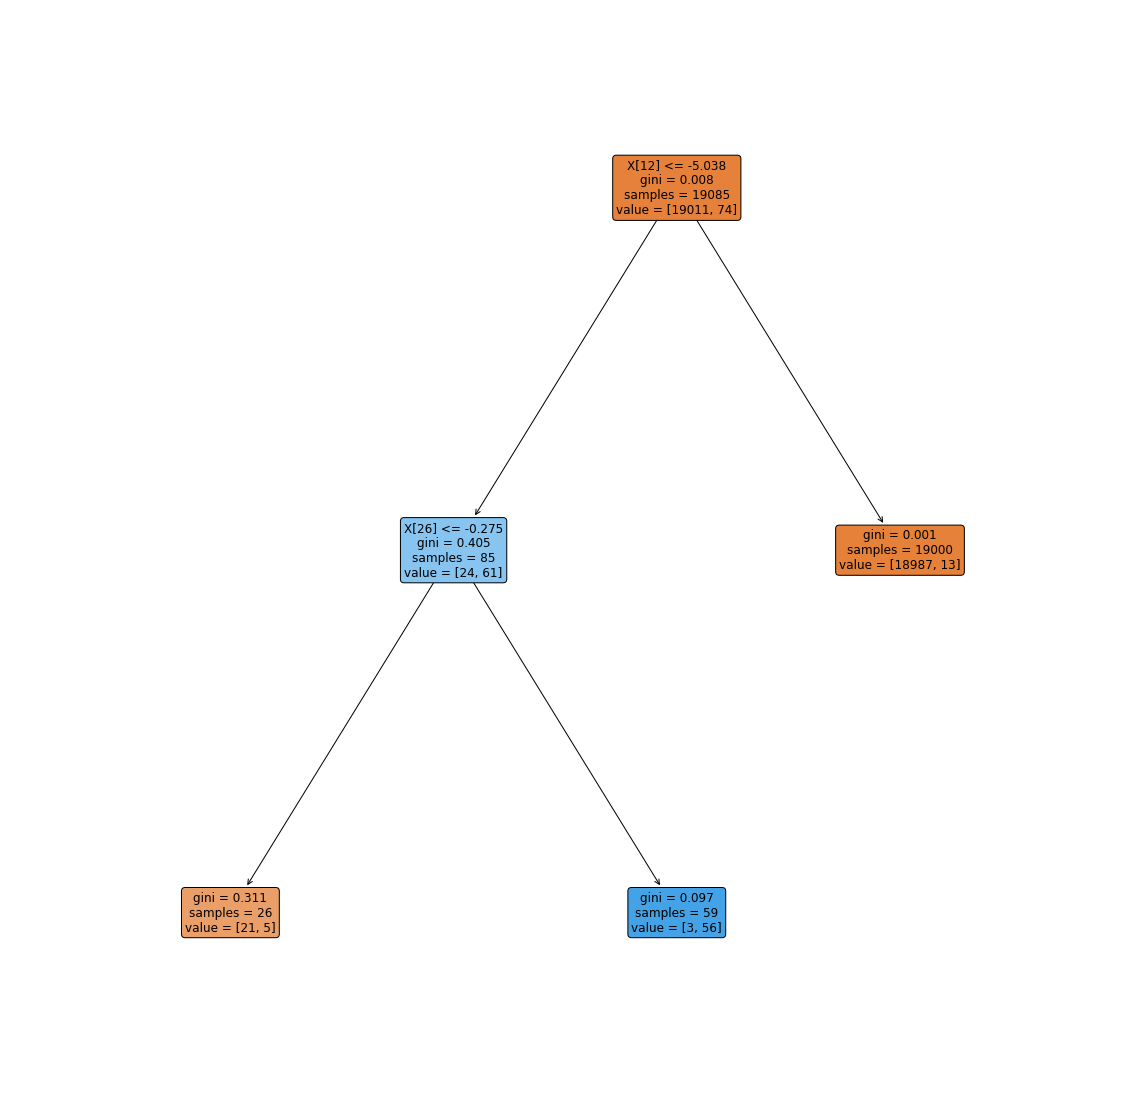

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

from sklearn.tree import plot_tree
plot_tree(dtc, filled=True, rounded=True, fontsize=12)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [10, 11, 12, 13, 14, 15]}
rfc = RandomForestClassifier(random_state=32)
gsc = GridSearchCV(rfc, param_grid=param_grid, return_train_score=True)
gsc.fit(Xtrain, Ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=32),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15]},
             return_train_score=True)

In [ ]:
gsc.cv_results_['mean_train_score']

array([0.9999607, 1.       , 1.       , 1.       , 1.       , 1.       ])

In [ ]:
best_index = gsc.cv_results_['mean_test_score'].argmax()

In [ ]:
gsc.cv_results_['params'][best_index]

{'max_depth': 10}

In [ ]:
# support vector classifier (SVC), LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier.
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

B1 = BaggingClassifier(base_estimator=SVC(random_state=32), n_estimators=15, random_state=32)
B1.fit(Xtrain, Ytrain)
b1_score = B1.score(Xtest, Ytest)

B2 = BaggingClassifier(base_estimator=LogisticRegression(random_state=32), n_estimators=15, random_state=32)
B2.fit(Xtrain, Ytrain)
b2_score = B2.score(Xtest, Ytest)

B3 = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=15, random_state=32)
B3.fit(Xtrain, Ytrain)
b3_score = B3.score(Xtest, Ytest)

B4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=32), n_estimators=15, random_state=32)
B4.fit(Xtrain, Ytrain)
b4_score = B4.score(Xtest, Ytest)

print(b1_score, b2_score, b3_score, b4_score)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9970662196144174 0.9981139983235541 0.9970662196144174 0.9993713327745181


In [ ]:
#Building Random forest model
from sklearn.ensemble import RandomForestClassifier
#creating model
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
#predictions
#Ypred = rfc.predict(Xtest)
#Xtest = Xtest.reset_index()


RandomForestClassifier()

In [ ]:
Ypred = rfc.predict(Xtest)

In [ ]:
#evaluating paramenters
# Evaluating the classifier
# printing every score of the classifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(frauds)
n_errors = (Ypred != Ytest).sum()
#outputs
print("The model used is Random Forest classifier")

acc = accuracy_score(Ytest, Ypred)
print("The accuracy is {}".format(acc))

prec = precision_score(Ytest, Ypred)
print("The precision is {}".format(prec))

rec = recall_score(Ytest, Ypred)
print("The recall is {}".format(rec))

f1 = f1_score(Ytest, Ypred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(Ytest, Ypred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9996137776061234
The precision is 0.9871794871794872
The recall is 0.7857142857142857
The F1-Score is 0.8750000000000001
The Matthews correlation coefficient is 0.8805302991855358


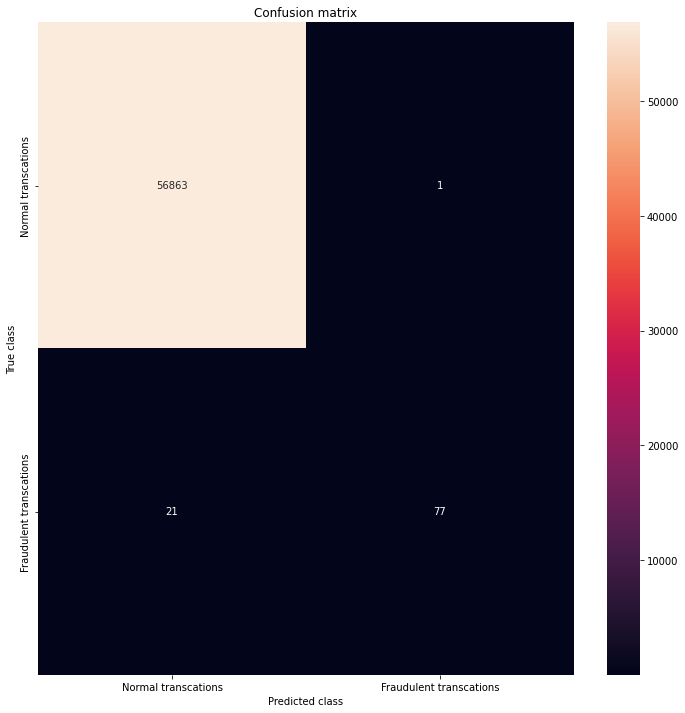

In [ ]:
# printing the confusion matrix
LABELS = ['Normal transcations', 'Fraudulent transcations']
conf_matrix = confusion_matrix(Ytest, Ypred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [ ]:
#pip install pycaret

In [ ]:
# Importing module and initializing setup
from pycaret.classification import * 
clf1 = setup(data = df, target = 'Class')


,Description,Value
0,session_id,5075
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
# command used for comparing all the models available in the library
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9382,0.7591,0.9407,0.8379,0.8376,0.8436,18.144
lda,Linear Discriminant Analysis,0.9994,0.8953,0.7619,0.8587,0.8051,0.8048,0.8074,1.364
lr,Logistic Regression,0.9991,0.9390,0.6081,0.8476,0.7029,0.7025,0.7148,7.365
dt,Decision Tree Classifier,0.9991,0.8603,0.7210,0.7618,0.7380,0.7376,0.7393,11.696
ridge,Ridge Classifier,0.9989,0.0000,0.4161,0.8440,0.5555,0.5550,0.5910,0.162
knn,K Neighbors Classifier,0.9984,0.5929,0.0495,0.8000,0.0925,0.0924,0.1950,2.632
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.091
svm,SVM - Linear Kernel,0.9982,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0003,6.603
lightgbm,Light Gradient Boosting Machine,0.9965,0.7268,0.5782,0.2687,0.3651,0.3636,0.3916,3.506
nb,Naive Bayes,0.9922,0.9632,0.6311,0.1324,0.2186,0.2164,0.2864,0.155


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5075, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5075, verbose=0,
                     warm_start=False)